In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import json
from pymol import cmd, CmdException
from matplotlib import cm

import os,time


# Define function to calculate secondary structure percentage
def calc_ss_percent(ss_string):
    Helix_len = 0
    Sheet_len = 0
    LoopR_len = 0

    for i in range(len(ss_string)):
        if ss_string[i] == 'H':
            Helix_len += 1
        elif ss_string[i] == 'S':
            Sheet_len += 1
        elif ss_string[i] == 'L':
            LoopR_len += 1
        else:
            return BaseException
    return Helix_len/len(ss_string),Sheet_len/len(ss_string),LoopR_len/len(ss_string)



In [2]:
# load dataframes
df_A501 = pd.read_csv("A501_results.csv")
df_3DAC = pd.read_csv("3DAC_results.csv")
df_Ecol = pd.read_csv("Ecoli_proteome.csv")
df_Cana = pd.read_csv("Canal_proteome.csv")
df_Metj = pd.read_csv("Metja_proteome.csv")
df_Myct = pd.read_csv("Myctu_proteome.csv")
df_Staa = pd.read_csv("Staau_proteome.csv")

df_list = [df_A501,df_Metj,df_3DAC,df_Ecol,df_Cana,df_Myct,df_Staa]
tick_list = ["A501","M. jannaschii","3DAC","E. coli","C. albicans","M. tuberculosis","S. aureus"]
color_list = ["tab:red","tab:gray","tab:blue","tab:gray","tab:gray","tab:gray","tab:gray"]
cmap_list = ["Reds","Greys","Blues","Greys","Greys","Greys","Greys"]

df_list_paper = [df_A501,df_3DAC]
tick_list_paper = ["A501","3DAC"]
color_list_paper = ["tab:red","tab:blue"]
cmap_list_paper = ["Reds","Blues"]


In [3]:
# Calculate secondary structure percentage
for j in range(len(df_list)):

    ss_H_list = []
    ss_S_list = []
    ss_L_list = []
    for i in range(df_list[j].shape[0]):
        ss_H,ss_S,ss_L = calc_ss_percent(df_list[j]["secondary_structure"][i])
        ss_H_list.append(ss_H)
        ss_S_list.append(ss_S)
        ss_L_list.append(ss_L)
    df_list[j]["ss_H"] = ss_H_list
    df_list[j]["ss_S"] = ss_S_list
    df_list[j]["ss_L"] = ss_L_list


In [4]:
# Calculate secondary structure percentage
for j in range(len(df_list_paper)):

    ss_H_list_paper = []
    ss_S_list_paper = []
    ss_L_list_paper = []
    for i in range(df_list_paper[j].shape[0]):
        ss_H,ss_S,ss_L = calc_ss_percent(df_list_paper[j]["secondary_structure"][i])
        ss_H_list_paper.append(ss_H)
        ss_S_list_paper.append(ss_S)
        ss_L_list_paper.append(ss_L)
    df_list_paper[j]["ss_H"] = ss_H_list_paper
    df_list_paper[j]["ss_S"] = ss_S_list_paper
    df_list_paper[j]["ss_L"] = ss_L_list_paper


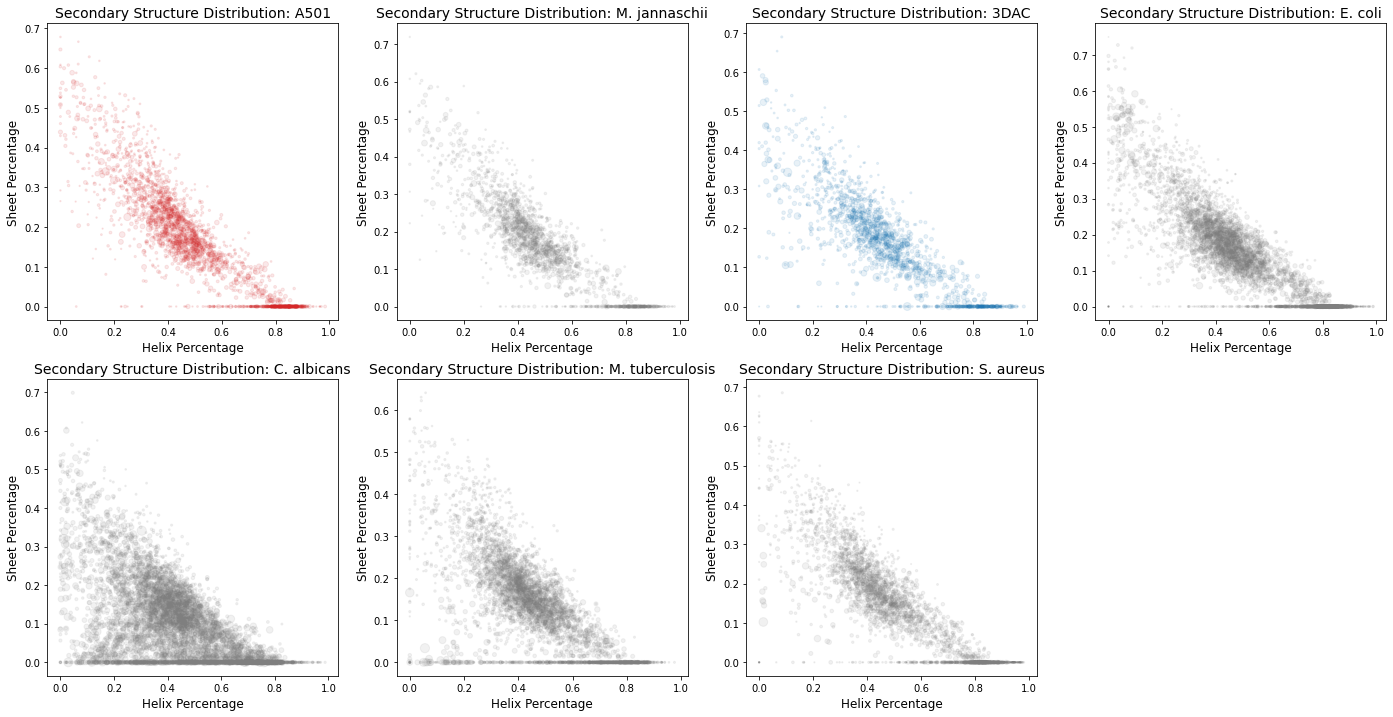

In [5]:
plt.figure(figsize=(24,12))

for i in range(len(df_list)):
    plt.subplot(2,4,i+1)
    plt.scatter(df_list[i][df_list[i]["ss_H"].notnull()]["ss_H"],
                df_list[i][df_list[i]["ss_S"].notnull()]["ss_S"],
                s=df_list[i][df_list[i]["sequence length"].notnull()]["sequence length"]/30,
                alpha=0.1,
                color=color_list[i])
    plt.title("Secondary Structure Distribution: %s"%tick_list[i],fontsize=14)
    plt.xlabel("Helix Percentage",fontsize=12)
    plt.ylabel("Sheet Percentage",fontsize=12)


plt.savefig("Figure/SS.pdf")
plt.savefig("Figure/SS.png")

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarnin

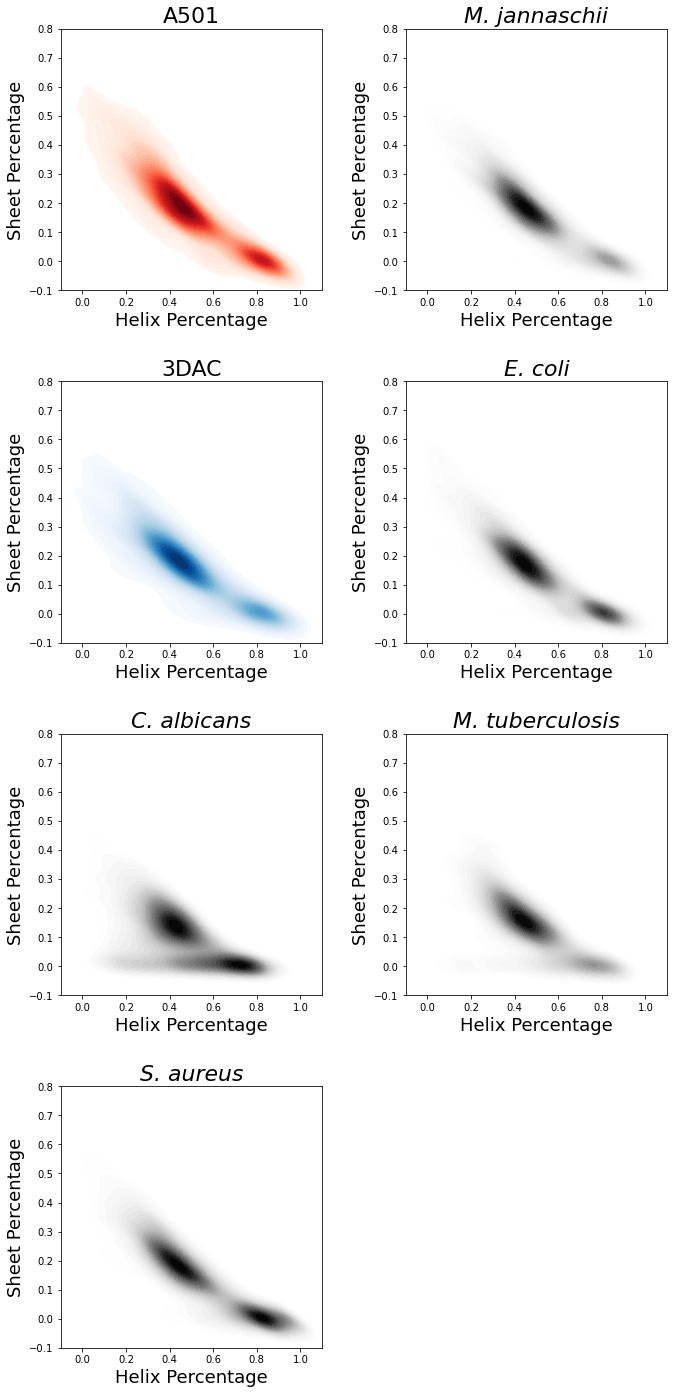

In [6]:
plt.figure(figsize=(10,20))

for i in range(len(df_list)):
    plt.subplot(4,2,i+1)
    sns.kdeplot(df_list[i][df_list[i]["ss_H"].notnull()]["ss_H"],
                df_list[i][df_list[i]["ss_S"].notnull()]["ss_S"],
                shade=True,
                levels=30,
                cmap=cmap_list[i])
    plt.ylim(-0.1,0.8)
    plt.xlim(-0.1,1.1)
    if i==0 or i==2:
        plt.title("%s"%tick_list[i],fontsize=22)
    else:
        plt.title("%s"%tick_list[i],fontsize=22,fontstyle='italic')
    plt.xlabel("Helix Percentage",fontsize=18)
    plt.ylabel("Sheet Percentage",fontsize=18)

plt.tight_layout(pad=3)

plt.savefig("Figure/SS_kdeplot.pdf")
plt.savefig("Figure/SS_kdeplot.png")

D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


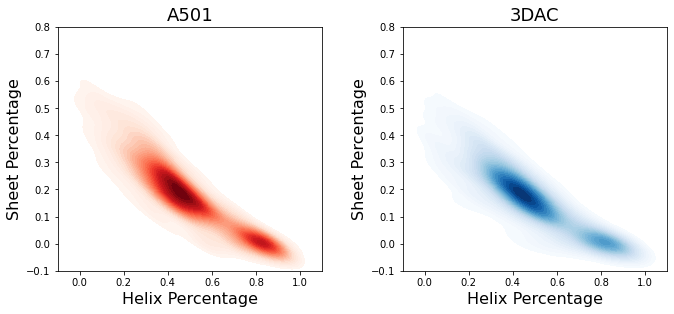

In [7]:
plt.figure(figsize=(10,5))

for i in range(len(df_list_paper)):
    plt.subplot(1,2,i+1)
    sns.kdeplot(df_list_paper[i][df_list_paper[i]["ss_H"].notnull()]["ss_H"],
                df_list_paper[i][df_list_paper[i]["ss_S"].notnull()]["ss_S"],
                shade=True,
                levels=30,
                cmap=cmap_list_paper[i])
    plt.ylim(-0.1,0.8)
    plt.xlim(-0.1,1.1)
    if i==0 or i==2:
        plt.title("%s"%tick_list_paper[i],fontsize=18)
    else:
        plt.title("%s"%tick_list_paper[i],fontsize=18)
    plt.xlabel("Helix Percentage",fontsize=16)
    plt.ylabel("Sheet Percentage",fontsize=16)

plt.tight_layout(pad=3)

plt.savefig("Figure/SS_kdeplot_paper.pdf")
plt.savefig("Figure/SS_kdeplot_paper.png")

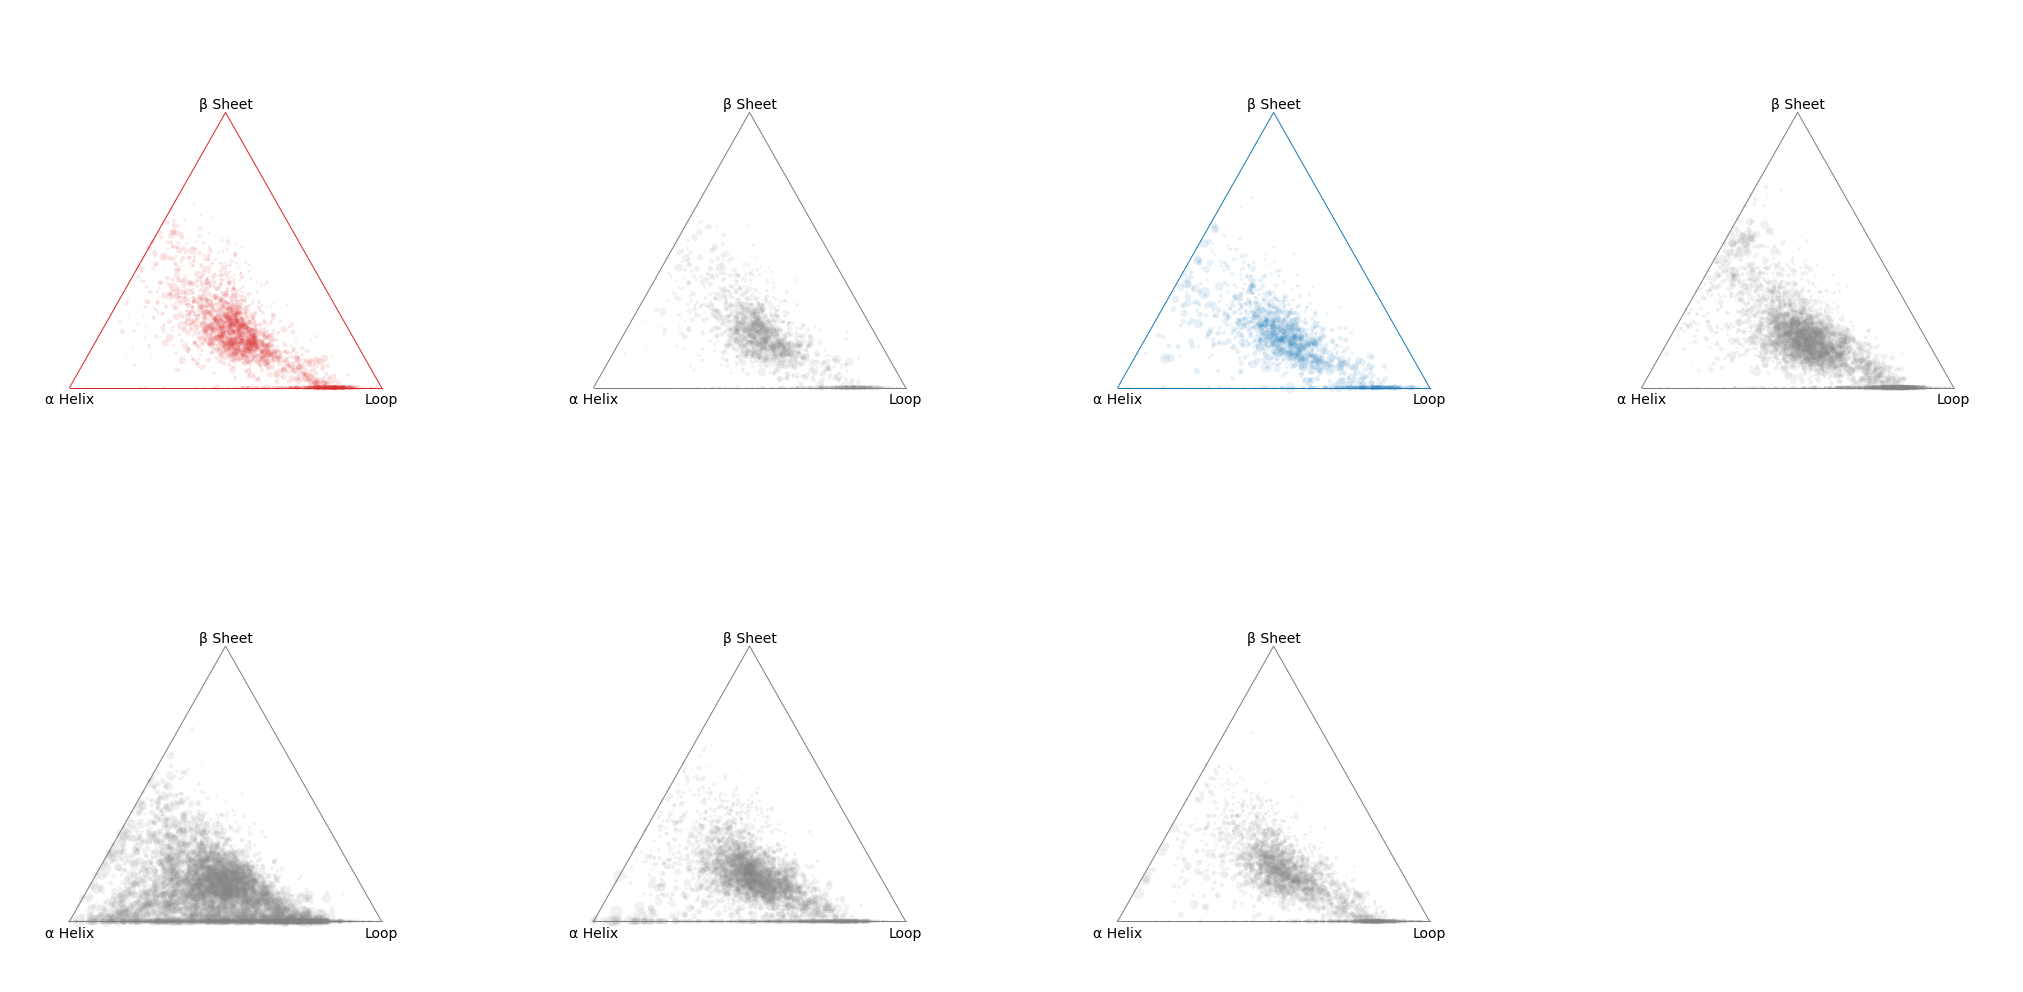

In [8]:
plt.figure(figsize=(36,18))

for i in range(len(df_list)):
    plt.subplot(2,4,i+1)
    plt.scatter(df_list[i][df_list[i]["ss_H"].notnull()]["ss_H"]+df_list[i][df_list[i]["ss_S"].notnull()]["ss_S"]/2,
                df_list[i][df_list[i]["ss_S"].notnull()]["ss_S"]/2*np.sqrt(3),
                s=df_list[i][df_list[i]["sequence length"].notnull()]["sequence length"]/15,
                edgecolor="None",
                alpha=0.1,
                color=color_list[i])
    plt.xlim(-0.2,1.2)
    plt.ylim(-0.2,1.2)
    plt.plot([0,1],[0,0],c=color_list[i],linewidth=1)
    plt.plot([0,1/2,1],[0,np.sqrt(3)/2,0],c=color_list[i],linewidth=1)
    plt.text(0,-0.05,"α Helix",ha="center",fontsize=14)
    plt.text(1,-0.05,"Loop",ha="center",fontsize=14)
    plt.text(0.5,0.88,"β Sheet",ha="center",fontsize=14)
    plt.axis('off')






plt.savefig("Figure/SS_triangle.pdf")
plt.savefig("Figure/SS_triangle.png")